### 4. Seaborn 패키지

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
iris = sns.load_dataset("iris")           # 붓꽃 데이터
titanic = sns.load_dataset("titanic")     # 타이타닉호 데이터
tips = sns.load_dataset("tips")           # 팁 데이터
flights = sns.load_dataset("flights")     # 여객운송 데이터
mpg = sns.load_dataset('mpg')             # mile per gallon 데이터

- 1차원분포
    - distplot: http://seaborn.pydata.org/generated/seaborn.distplot.html
        - Seaborn의 distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용된다.
        - displot으로 해야함

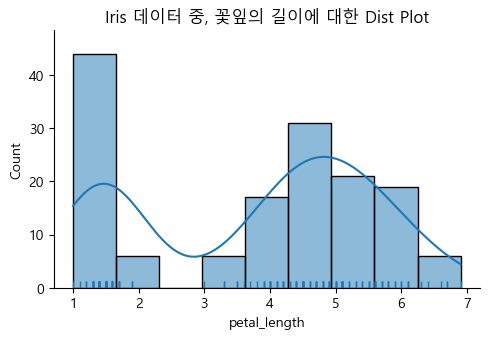

In [35]:
# displot(distribution plot) 분포그림 / distplot은 안됨
# x = iris.petal_length.values  이내용을 바로 아래에 집어넣은것임
# plt.figure(figsize=(5,3)) 사이즈 안줄어듬
fig = sns.displot(x='petal_length', kde=True, rug=True, data=iris)
fig.fig.set_size_inches(5,3) # 사이즈 줄이기
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()


- 카운트 플롯

In [2]:
sns.countplot(x='class', data=titanic)
plt.title('타이타닉호의 선실별 승객수')
plt.show()

NameError: name 'sns' is not defined

In [1]:
sns.countplot(x='class', hue='survived' ,data=titanic, palette='magma') # hue ~ 에 따라 색을 다르게 하라는 의미
plt.title('타이타닉호의 선실별 생존수/사망자수')
plt.show()

NameError: name 'sns' is not defined

- 다차원 실수 데이터

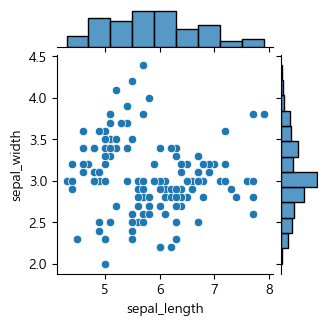

In [36]:
# joint plot
fig = sns.jointplot(x='sepal_length', y='sepal_width', data=iris)
fig.fig.set_size_inches(3,3)
plt.show()

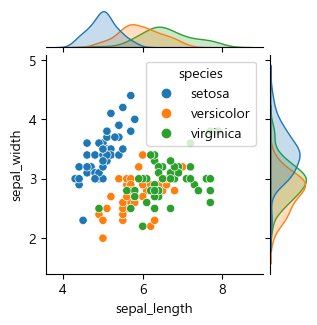

In [37]:
# joint plot + hue
fig = sns.jointplot(x='sepal_length', y='sepal_width', data=iris, hue='species')
fig.fig.set_size_inches(3,3)
plt.show()

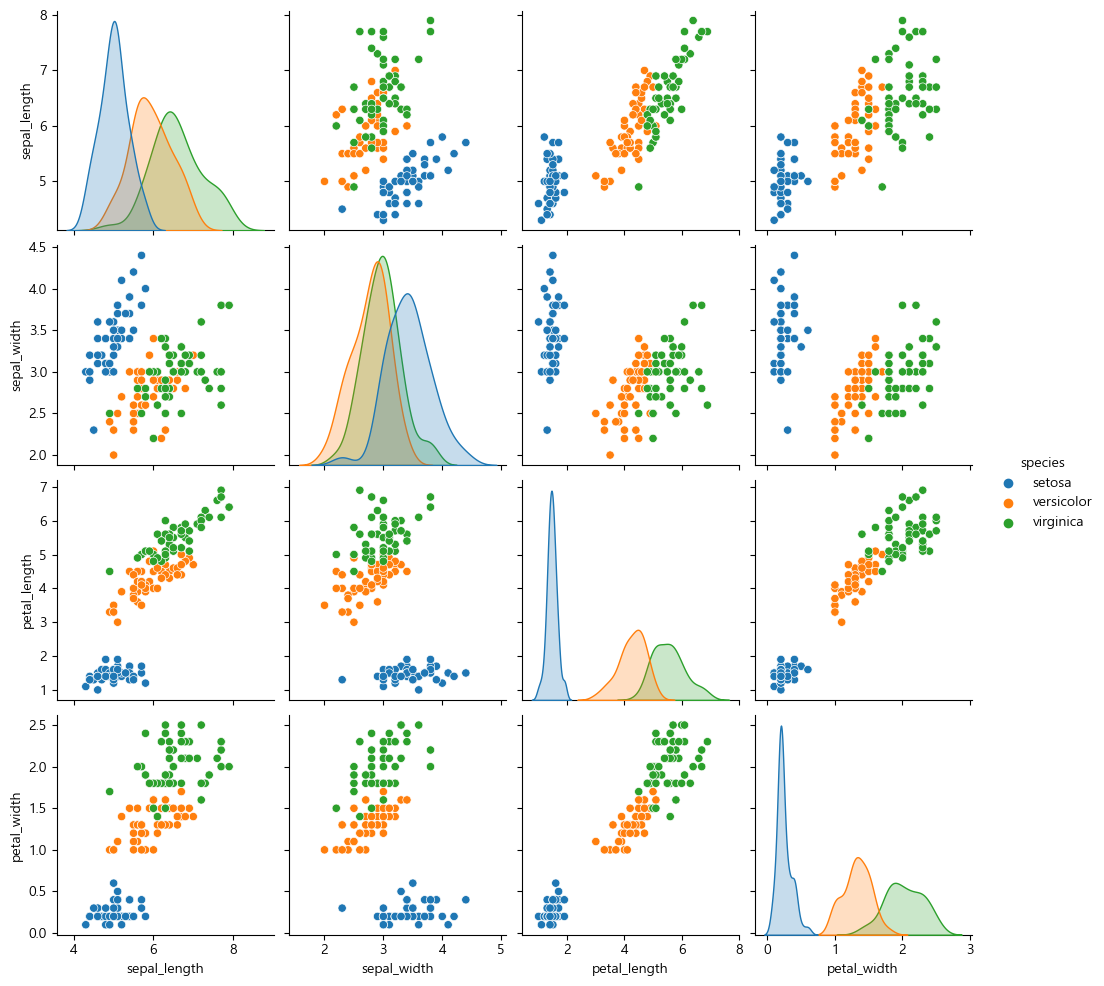

In [40]:
# pair plot
sns.pairplot(hue='species' ,data=iris);

- 다차원 카테고리 데이터

In [28]:
# heatmap
dt = titanic.pivot_table('survived','class','sex','count') # 아래코드와 동일한의미
dt = titanic.pivot_table(values='survived',index='class', columns='sex', aggfunc='count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


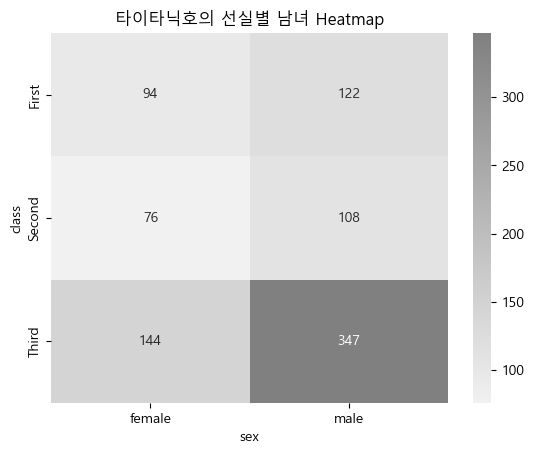

In [29]:
# heatmap은 사이즈 줄이는거 모름
sns.heatmap(dt, cmap=sns.light_palette("gray", as_cmap=True), 
            annot=True, fmt='d') # annot 글자표시 94,76,144,122,108,347 
plt.title('타이타닉호의 선실별 남녀 Heatmap')
plt.show()

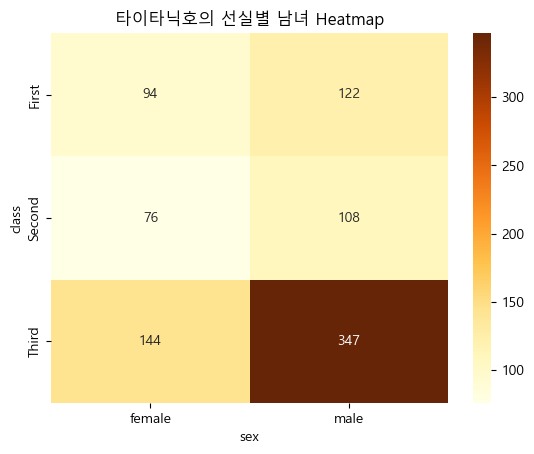

In [33]:
sns.heatmap(dt, cmap='YlOrBr', # red , puple
            annot=True, fmt='d') # annot 글자표시 94,76,144,122,108,347 
plt.title('타이타닉호의 선실별 남녀 Heatmap')
plt.show()

In [41]:
print(flights.shape) # flights = 1949 미국내에서 한달동안 상업여행을한 사람수 data
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


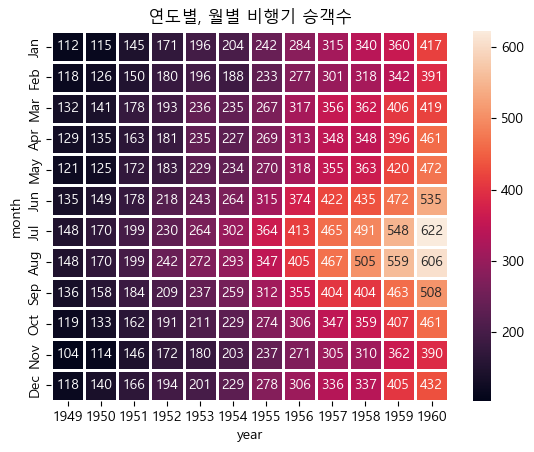

In [44]:
passengers = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(passengers, annot=True, fmt='d', linewidths=1) # formating은 대시말
plt.title('연도별, 월별 비행기 승객수');

- 다차원 복합 데이터 - barplot

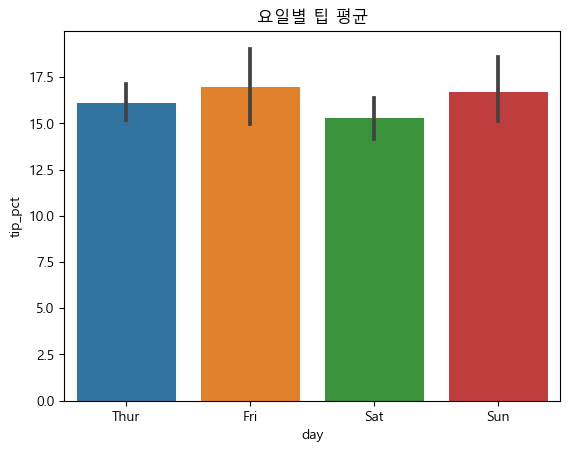

In [47]:
# barplot 막대그래프
tips['tip_pct'] = (tips.tip / tips.total_bill *100).round(2)
sns.barplot(x='day',y='tip_pct', data=tips)
plt.title('요일별 팁 평균');
# 사이즈 줄이는거 모름
# 막대안에 있는 막대선은 신뢰구간이라고 함.  평균의 95%  +,-0.5% /신뢰구간을 직선으로 표시

In [48]:
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [50]:
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])
mpg['manufacturer']

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: manufacturer, Length: 398, dtype: object

In [51]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


Text(0.5, 1.0, '제조사별 평균 MPG(miles per gallon 연비)')

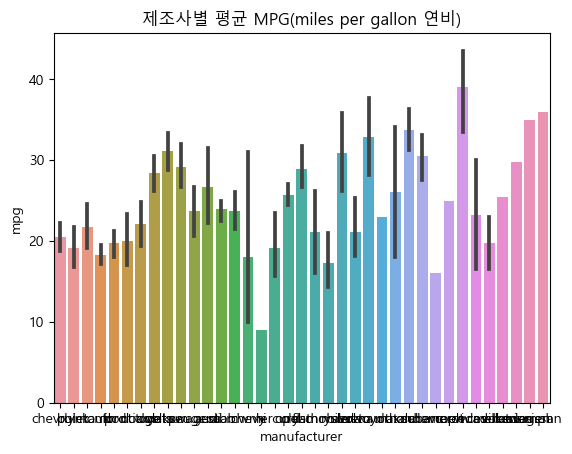

In [55]:
sns.barplot(x='manufacturer', y='mpg', data=mpg) 
plt.title('제조사별 평균 MPG(miles per gallon 연비)')

Text(0.5, 1.0, '제조사별 평균 MPG(miles per gallon 연비)')

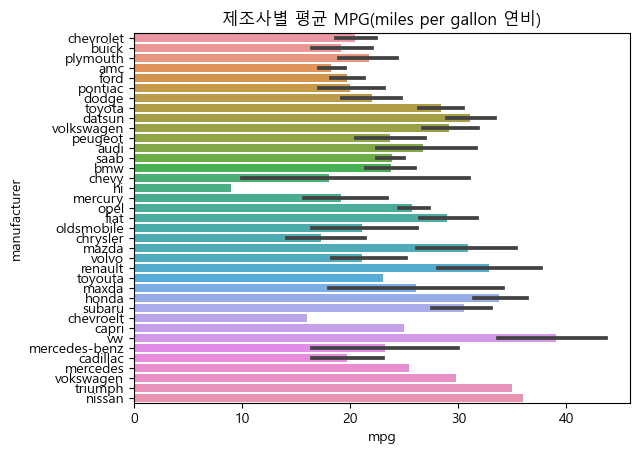

In [54]:
# x와 y를 바꿔주면 수평 막대그래프가 됨
sns.barplot(y='manufacturer', x='mpg', data=mpg) # barh사용하지 않더라도 x를 y값을 바꿔주면 barh형식으로 출력됨
plt.title('제조사별 평균 MPG(miles per gallon 연비)')

- boxplot

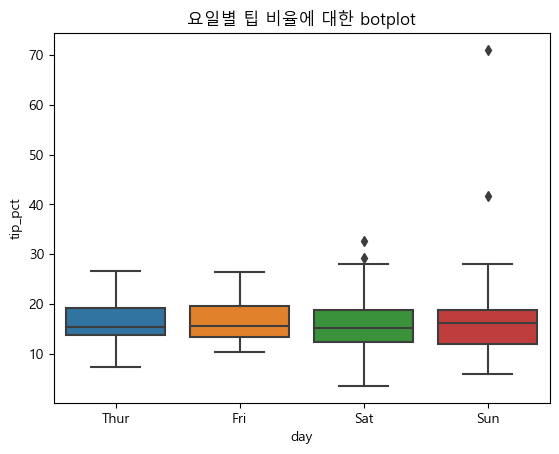

In [57]:
# 요일별 팁의 비율 
# 사이즈 조정 안됨
sns.boxplot(x='day',y='tip_pct', data=tips)
plt.title('요일별 팁 비율에 대한 botplot'); 

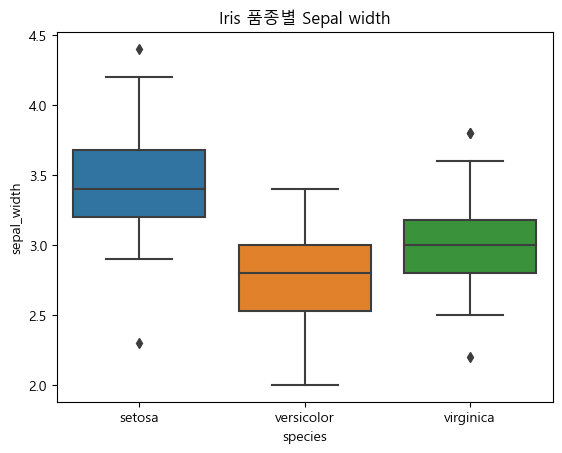

In [59]:
# iris 
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Iris 품종별 Sepal width');

<Axes: >

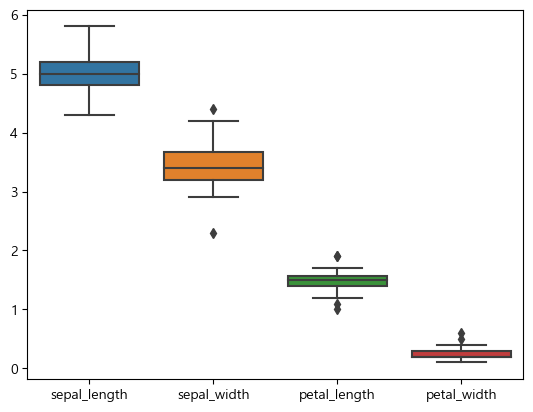

In [60]:
sns.boxplot(data=iris[iris.species == 'setosa'])

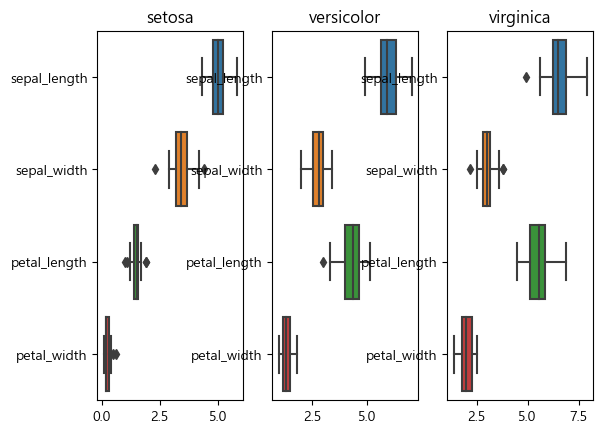

In [64]:
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=iris[iris.species == species], orient='horizontal')
    plt.title(species)
plt.show()

- regplot
    - 회귀선 알아서 그려줌

In [65]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


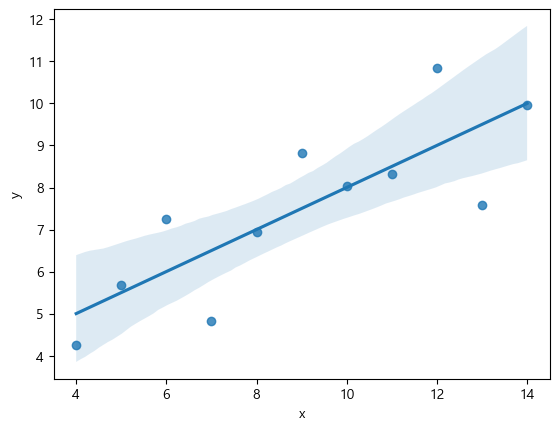

In [66]:
sns.regplot(x='x', y='y', data=ans[ans.dataset == 'I']);
#사이즈 조정모름

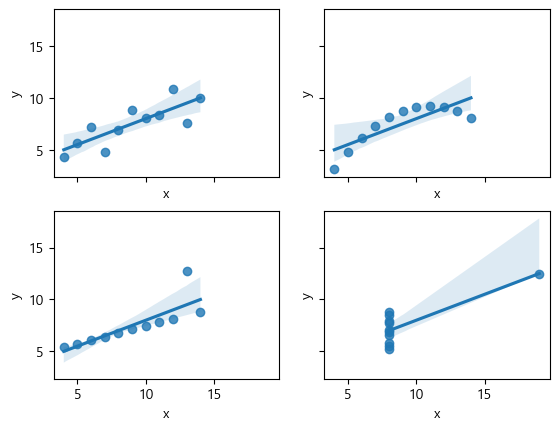

In [67]:
_, axes = plt.subplots(2,2, sharex=True, sharey=True) 
for i, roman in enumerate(ans.dataset.unique()):
    row, col = i // 2, i % 2
    sns.regplot(x='x', y='y', data=ans[ans.dataset == roman], ax=axes[row][col]);


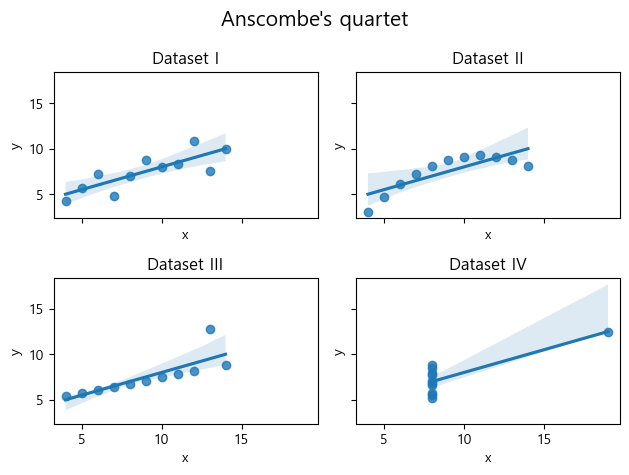

In [68]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True) 
for i, roman in enumerate(ans.dataset.unique()):
    ax = axes[i // 2, i % 2]
    sns.regplot(x='x', y='y', data=ans[ans.dataset == roman], ax=ax)
    ax.set_title(f'Dataset {roman}')
fig.suptitle("Anscombe's quartet", fontsize=15)
plt.tight_layout()
plt.show()